In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import psutil
from datetime import datetime
from multiprocessing import Process, Queue, Event
from time import sleep,localtime

 # Old implementation 

In [3]:
class my_foo_class():
    def __init__(self, queue):
        self.foo = 1
        self._worker_loop = Process(target=self.worker, args=(1, queue))
        #self.trigger_queue = Queue()
        self.trigger_event = Event()
        
    def worker(self, num, queue):
        """thread worker function"""
        # dummy queue
        some_queue = queue
        # Do nothing
        while True:
            sleep(0.1)
        return

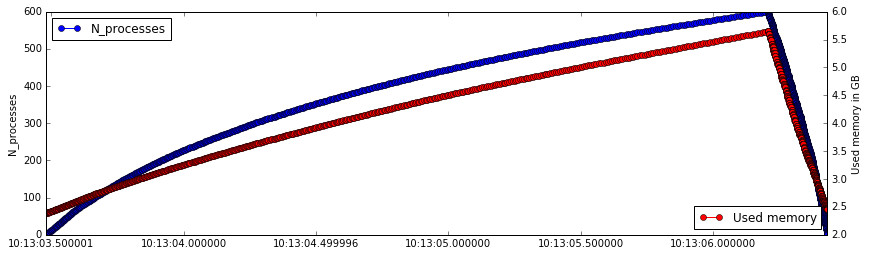

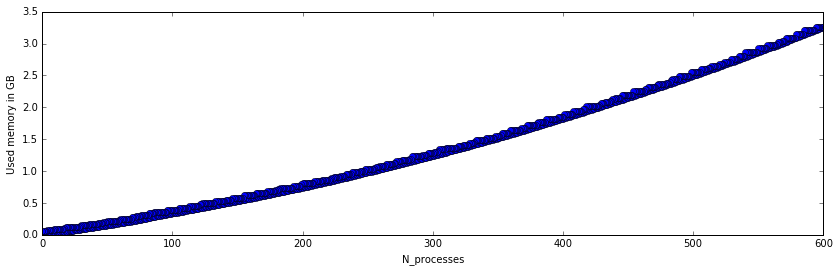

In [4]:
jobs = []

mem_list = []
swap_list = []
N_jobs_list = []
t_list = []

N = 400

main_foo_queue = Queue()

for i in range(N):
    #p = Process(target=worker, args=(i, main_foo_queue))
    #sleep(0.01)
    p = my_foo_class(main_foo_queue)
    
    jobs.append(p)
    
    p._worker_loop.start()
    #p.start()
    
    N_jobs_list.append(len(jobs))
    mem_list.append(psutil.virtual_memory().used/1e9)
    swap_list.append(psutil.swap_memory().used/1e9)
    t_list.append(datetime.utcnow())
    
for i in range(N):
    p = jobs.pop()
    
    p._worker_loop.terminate()
    #p.terminate()
    #sleep(0.01)
    N_jobs_list.append(len(jobs))
    mem_list.append(psutil.virtual_memory().used/1e9)
    swap_list.append(psutil.swap_memory().used/1e9)
    t_list.append(datetime.utcnow())


fig, ax1 = subplots(figsize=(14,4))
ax1.plot(t_list, N_jobs_list,'bo-', label='N_processes')
ax2 = ax1.twinx()
ax2.plot(t_list, mem_list,'ro-', label='Used memory')
#ax2.plot(t_list, swap_list,'go-')
ax1.legend(loc=2)
ax1.set_ylabel('N_processes')
ax2.legend(loc=4)
ax2.set_ylabel('Used memory in GB');

fig, ax = subplots(figsize=(14,4))
ax.plot(N_jobs_list, array(mem_list)-mem_list[0], 'bo-')
ax.set_xlabel('N_processes')
ax.set_ylabel('Used memory in GB');

# New implementation 

In [6]:
class my_foo_class():
    def __init__(self):
        self.foo = 1
    def query():
        # Do something
        a = 1+1
        return a
    
def worker(queue_in, queue_out):
    from os import getpid
    pid = getpid()
    snmp_session = 'some session'
    command = queue_in.get()
    #while True:
    #    sleep(1)

In [5]:
def worker(queue_in, queue_out):
    from os import getpid
    pid = getpid()
    snmp_session = 'some session'
    while True:
        command = queue_in.get()
        if command == 'trigger':
            #snmp_session.do_query()   
            queue_out.put(pid)

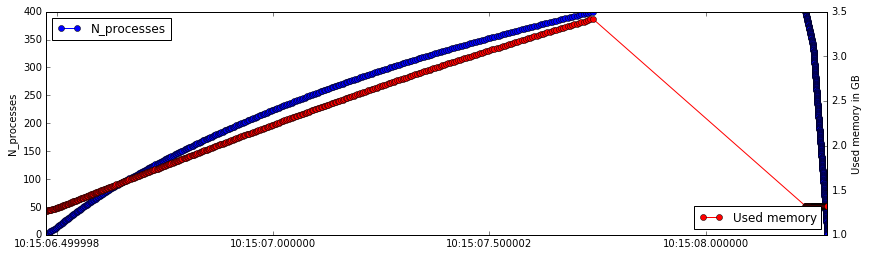

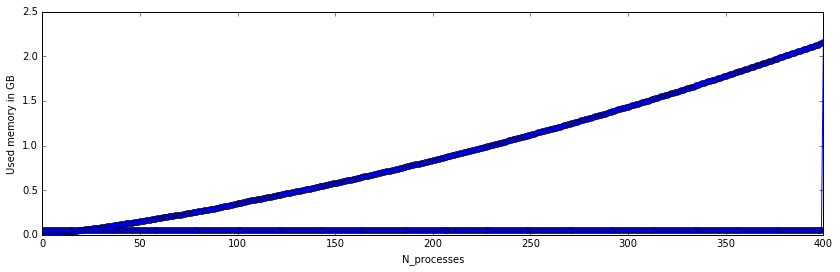

In [7]:
jobs = []

mem_list = []
swap_list = []
N_jobs_list = []
t_list = []

N = 400

main_output_queue = Queue()
trigger_queue_list = []

for i in range(N):
    trigger_queue = Queue()
    trigger_queue_list.append(trigger_queue)
    p = Process(target=worker, args=(trigger_queue, main_output_queue))
    jobs.append(p)
    p.start()
    
    N_jobs_list.append(len(jobs))
    mem_list.append(psutil.virtual_memory().used/1e9)
    swap_list.append(psutil.swap_memory().used/1e9)
    t_list.append(datetime.utcnow())
    
for trigger_queue in trigger_queue_list:
    trigger_queue.put('trigger')
        
sleep(0.1)
        
for i in range(N):
    p = jobs.pop()
    p.terminate()
    N_jobs_list.append(len(jobs))
    mem_list.append(psutil.virtual_memory().used/1e9)
    swap_list.append(psutil.swap_memory().used/1e9)
    t_list.append(datetime.utcnow())


fig, ax1 = subplots(figsize=(14,4))
ax1.plot(t_list, N_jobs_list,'bo-', label='N_processes')
ax2 = ax1.twinx()
ax2.plot(t_list, mem_list,'ro-', label='Used memory')
#ax2.plot(t_list, swap_list,'go-')
ax1.legend(loc=2)
ax1.set_ylabel('N_processes')
ax2.legend(loc=4)
ax2.set_ylabel('Used memory in GB');

fig, ax = subplots(figsize=(14,4))
ax.plot(N_jobs_list, array(mem_list)-mem_list[0], 'bo-')
ax.set_xlabel('N_processes')
ax.set_ylabel('Used memory in GB');